#Analyse de l'incidence de la varicelle

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence de la varicelle sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/)
Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1991 et se termine avec une semaine récente.

In [4]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv?v=8akq5"

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json)

In [8]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202345          7   6118     3049    9187       9           4   
1     202344          7   3758     1702    5814       6           3   
2     202343          7   3891     1675    6107       6           3   
3     202342          7   3968     1212    6724       6           2   
4     202341          7   3356     1764    4948       5           3   
5     202340          7   2845     1410    4280       4           2   
6     202339          7   1739      629    2849       3           1   
7     202338          7   1663      274    3052       3           1   
8     202337          7   1122      223    2021       2           1   
9     202336          7    726       10    1442       1           0   
10    202335          7    961       96    1826       1           0   
11    202334          7   1168        9    2327       2           0   
12    202333          7   3308     1184    5432       5           2   
13    202332          7   7996     1120   14872      12           2   
14    202331          7   3318     1398    5238       5           2   
15    202330          7   5821     3269    8373       9           5   
16    202329          7  13558     8297   18819      20          12   
17    202328          7   6700     4043    9357      10           6   
18    202327          7   7253     4599    9907      11           7   
19    202326          7   9192     6223   12161      14          10   
20    202325          7  11498     8257   14739      17          12   
21    202324          7  11115     7968   14262      17          12   
22    202323          7  12563     6134   18992      19           9   
23    202322          7  12184     8125   16243      18          12   
24    202321          7  11349     7598   15100      17          11   
25    202320          7   9000     4615   13385      14           7   
26    202319          7   9344     6091   12597      14           9   
27    202318          7  10671     7291   14051      16          11   
28    202317          7   9184     6162   12206      14           9   
29    202316          7  11387     8014   14760      17          12   
...      ...        ...    ...      ...     ...     ...         ...   
1689  199126          7  17608    11304   23912      31          20   
1690  199125          7  16169    10700   21638      28          18   
1691  199124          7  16171    10071   22271      28          17   
1692  199123          7  11947     7671   16223      21          13   
1693  199122          7  15452     9953   20951      27          17   
1694  199121          7  14903     8975   20831      26          16   
1695  199120          7  19053    12742   25364      34          23   
1696  199119          7  16739    11246   22232      29          19   
1697  199118          7  21385    13882   28888      38          25   
1698  199117          7  13462     8877   18047      24          16   
1699  199116          7  14857    10068   19646      26          18   
1700  199115          7  13975     9781   18169      25          18   
1701  199114          7  12265     7684   16846      22          14   
1702  199113          7   9567     6041   13093      17          11   
1703  199112          7  10864     7331   14397      19          13   
1704  199111          7  15574    11184   19964      27          19   
1705  199110          7  16643    11372   21914      29          20   
1706  199109          7  13741     8780   18702      24          15   
1707  199108          7  13289     8813   17765      23          15   
1708  199107          7  12337     8077   16597      22          15   
1709  199106          7  10877     7013   14741      19          12   
1710  199105          7  10442     6544   14340      18          11   
1711  199104          7   7913     4563   11263      14           8   
1712  199103          7  15387    10484   20290      27          18   
1713  199102          7  16277  

Y a-t-il des points manquants dans ce jeux de données ? Non.

Nos données utilisent une convention inhabituelle: le numéro de semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.

Un deuxième problème est que Pandas ne comprend pas les numéros de semaine.  Il faut lui fournir les dates de début et de fin de semaine. Nous utilisons pour cela la bibliothèque `isoweek

Comme la conversion des semaines est devenu assez complexe, nous écrivons une petite fonction Python pour cela. Ensuite, nous l'appliquons à tous les points de nos donnés. Les résultats vont dans une nouvelle colonne 'period'.

In [11]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

raw_data['period'] = [convert_week(yw) for yw in raw_data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans le sens chronologique.

In [13]:
sorted_data = raw_data.set_index('period').sort_index()

Un premier regard sur les données !

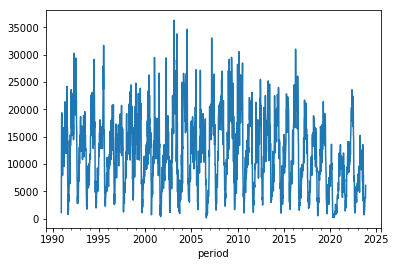

In [14]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre que 

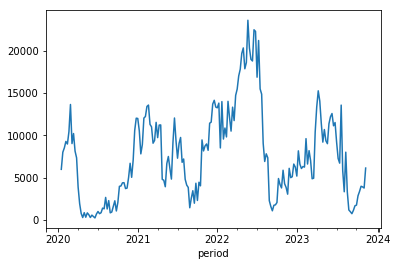

In [15]:
sorted_data['inc'][-200:].plot()

##Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval entre deux années civiles, nous définissons la période de référence entre deux minima de l'incidence, du 1er août de l'année N au 1er août de l'année N+1.

Notre tâche est un peu compliquée par le fait que l'année ne comporte pas un nombre entier de semaines. Nous modifions donc un peu nos périodes de référence: à la place du 1er août de chaque année, nous utilisons le premier jour de la semaine qui contient le 1er août.

Comme l'incidence de la varicelle est très faible en été, cette modification ne risque pas de fausser nos conclusions.

L'année 1990, la première année incomplète. Nous commençons donc l'analyse en 1991.

In [20]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er août, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. 

Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [21]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

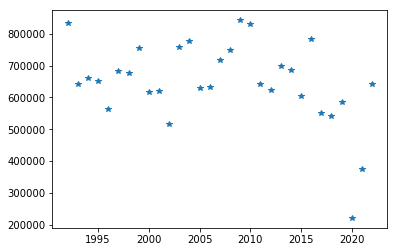

In [22]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [23]:
yearly_incidence.sort_values()

2020    221186
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2022    641397
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64